# Assignment 2

Submitted by Ramin Vali

In this assigment, we will work with the *Adult* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/2/adult). Extract the data files into the subdirectory: `../data/adult/` (relative to `./src/`).

## Variable Description

There are several files that you will get in the download archive. We will only use one file: `adult.data`. The file is comma-separated, does not contains headers, and the variable specification is below.


|Variable Name |Role |Type |Demographic |Description |Units |Missing Values|
|--------------|-----|-----|------------|------------|------|--------------|
|age |Feature |Integer |Age |N/A | |no|
|workclass |Feature |Categorical |Income |Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. | |yes|
|fnlwgt |Feature |Integer | | | |no|
|education |Feature |Categorical |Education Level |Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. | |no|
|education-num |Feature |Integer |Education Level | | |no|
|marital-status |Feature |Categorical |Other |Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. | |no|
|occupation |Feature |Categorical |Other |Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. | |yes|
|relationship |Feature |Categorical |Other |Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. | |no|
|race |Feature |Categorical |Race |White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. | |no|
|sex |Feature |Binary |Sex |Female, Male. | |no|
|capital-gain |Feature |Integer | | | |no|
|capital-loss |Feature |Integer | | | |no|
|hours-per-week |Feature |Integer | | | |no|
|native-country |Feature |Categorical |Other |United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. | |yes|
|income |Target |Binary |Income |>50K, <=50K. | |no|


## Objective

The objective of this assignment is to construct a preprocessing and model pipeline to predict the variable `income`. We will evaluate this pipeline using cross-validation.

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [1]:
import pandas as pd
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
    'native-country', 'income'
]
adult_dt = (pd.read_csv('../data/adult/adult.data', header = None, names = columns)
              .assign(income = lambda x: (x.income.str.strip() == '>50K')*1))


# Get X and Y

Create the features data frame and target data:

+ Create a dataframe `X` that holds the features (all columns that are not `income`).
+ Create a dataframe `Y` that holds the target data (`income`).
+ From `X` and `Y`, obtain the training and testing data sets:

    - Use a train-test split of 70-30%. 
    - Set the random state of the splitting function to 42.

In [2]:
adult_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


In [3]:
adult_dt.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [4]:
X = adult_dt.drop(columns = 'income')
Y = adult_dt['income']
X.shape, Y.shape

((32561, 14), (32561,))

In [5]:
X.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

## Random States

Please comment: 

+ What is the [random state](https://scikit-learn.org/stable/glossary.html#term-random_state) of the [splitting function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)? 
+ Why is it [useful](https://en.wikipedia.org/wiki/Reproducibility)?

(Comment here.)
The random_satet of the splitting function ensures consistent (psuedo) random number generation over multiple calls and across various user platforms. Since the train test split uses stratified sampling, and the samples are split in random fashion, it is important to have a reproducible way of randomly splitting the dat. 
It is useful because we can ensure we get the same sequence of random variables leading to reroducibility in our train test splits and therefore meaningful comparisons in the experiment results. 

# Preprocessing

Create a [Column Transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) that treats the features as follows:

- Numerical variables

    * Apply [KNN-based imputation for completing missing values](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html):
        
        + Consider the 7 nearest neighbours.
        + Weight each neighbour by the inverse of its distance, causing closer neigbours to have more influence than more distant ones.
    * [Scale features using statistics that are robust to outliers](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler).

- Categorical variables: 
    
    * Apply a [simple imputation strategy](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer):

        + Use the most frequent value to complete missing values, also called the *mode*.

    * Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):
        
        + Handle unknown labels if they exist.
        + Drop one column for binary variables.
    
    
The column transformer should look like this:

![](./img/assignment_2__column_transformer.png)

In [7]:
num_cols = X.select_dtypes(include='number').columns.to_list() # get numerical variables - checked for no binary variables as integers.
cat_cols = X.select_dtypes(include='object').columns.to_list() # get categorical variables

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import  KNNImputer, SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder


pipe_num_robust = Pipeline([
    ('knn_imputer', KNNImputer(n_neighbors=7, weights='distance')),
    ('robust_scaler', RobustScaler())
])

pipe_cat_simple = Pipeline([
    ('simple_imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore',drop='if_binary'))
])

ctransform = ColumnTransformer([
    ('num_transform', pipe_num_robust, num_cols),
    ('cat_transform', pipe_cat_simple, cat_cols)
])

ctransform

ColumnTransformer(transformers=[('num_transform',
                                 Pipeline(steps=[('knn_imputer',
                                                  KNNImputer(n_neighbors=7,
                                                             weights='distance')),
                                                 ('robust_scaler',
                                                  RobustScaler())]),
                                 ['age', 'fnlwgt', 'education-num',
                                  'capital-gain', 'capital-loss',
                                  'hours-per-week']),
                                ('cat_transform',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore'))]),
                                 ['workclass', 'education', 'marital-status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native-country'])])

## Model Pipeline

Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `classifier` and assign a [`RandomForestClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) to it.

The pipeline looks like this:

![](./img/assignment_2__pipeline.png)

In [9]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, min_samples_split=5, max_features='log2') #log2 so we run the models a little bit faster

pipe_final = Pipeline([
    ('preprocessing', ctransform),
    ('rfc',rfc)
])

pipe_final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num_transform',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer(n_neighbors=7,
                                                                              weights='distance')),
                                                                  ('robust_scaler',
                                                                   RobustScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat_transform',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native-country'])])),
                ('rfc',
                 RandomForestClassifier(max_features='log2',
                                        min_samples_split=5,
                                        n_estimators=200))])

# Cross-Validation

Evaluate the model pipeline using [`cross_validate()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html):

+ Measure the following [preformance metrics](https://scikit-learn.org/stable/modules/model_evaluation.html#common-cases-predefined-values): negative log loss, ROC AUC, accuracy, and balanced accuracy.
+ Report the training and validation results. 
+ Use five folds.


In [10]:
from sklearn.model_selection import cross_validate

scoring = ['neg_log_loss', 'roc_auc', 'accuracy', 'balanced_accuracy']

cv_result = cross_validate(pipe_final, X_train, Y_train, cv = 5, scoring = scoring, error_score='raise')
cv_result

c:\Users\Ramin\Documents\1DATA SCIENCE\DSI\production\env\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ramin\Documents\1DATA SCIENCE\DSI\production\env\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


{'fit_time': array([22.87688279, 18.10206437, 18.66896534, 20.98853683, 27.08242941]),
 'score_time': array([0.46346378, 0.52299118, 0.64778018, 0.47470808, 0.54700041]),
 'test_neg_log_loss': array([-0.31467008, -0.31929089, -0.32178212, -0.31137386, -0.32539213]),
 'test_roc_auc': array([0.91010268, 0.90746613, 0.90602388, 0.9122531 , 0.90743625]),
 'test_accuracy': array([0.85391533, 0.84974775, 0.85761299, 0.86265906, 0.86222027]),
 'test_balanced_accuracy': array([0.77727088, 0.76929593, 0.77833362, 0.78504861, 0.78383595])}

Display the fold-level results as a pandas data frame and sorted by negative log loss of the test (validation) set.

In [11]:
result_df = pd.DataFrame(cv_result).assign(experiment = 1)
result_df

,fit_time,score_time,test_neg_log_loss,test_roc_auc,test_accuracy,test_balanced_accuracy,experiment
0,22.876883,0.463464,-0.314670,0.910103,0.853915,0.777271,1
1,18.102064,0.522991,-0.319291,0.907466,0.849748,0.769296,1
2,18.668965,0.647780,-0.321782,0.906024,0.857613,0.778334,1
3,20.988537,0.474708,-0.311374,0.912253,0.862659,0.785049,1
4,27.082429,0.547000,-0.325392,0.907436,0.862220,0.783836,1


Calculate the mean of each metric. 

In [12]:
result_df.mean()

fit_time                  21.543776
score_time                 0.531189
test_neg_log_loss         -0.318502
test_roc_auc               0.908656
test_accuracy              0.857231
test_balanced_accuracy     0.778757
experiment                 1.000000
dtype: float64

c:\Users\Ramin\Documents\1DATA SCIENCE\DSI\production\env\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ramin\Documents\1DATA SCIENCE\DSI\production\env\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ramin\Documents\1DATA SCIENCE\DSI\production\env\lib\site-packages\sklearn\preprocessing\_encoders.py:241: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


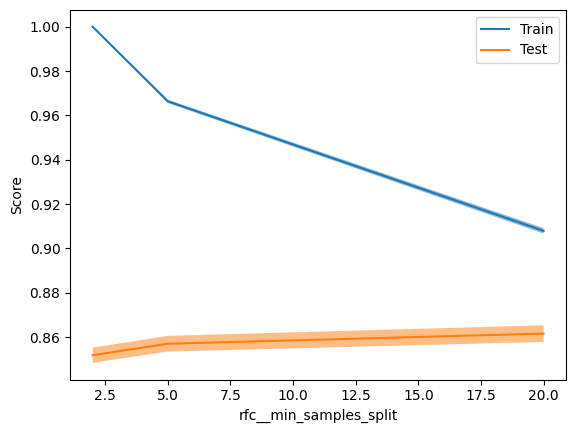

In [13]:
# for fun - takes about 5 minutes
from sklearn.model_selection import ValidationCurveDisplay

ValidationCurveDisplay.from_estimator(pipe_final, X_train,
                                      Y_train,
                                      param_name='rfc__min_samples_split',
                                      param_range=[2,5,20])


Looks like we are overfitting, and raising the minimum samples split helps slightly. 


Calculate the same performance metrics (negative log loss, ROC AUC, accuracy, and balanced accuracy) using the testing data `X_test` and `Y_test`. Display results as a dictionary.

*Tip*: both, `roc_auc()` and `neg_log_loss()` will require prediction scores from `pipe.predict_proba()`. However, for `roc_auc()` you should only pass the last column `Y_pred_proba[:, 1]`. Use `Y_pred_proba` with `neg_log_loss()`.

In [14]:
from sklearn.metrics import roc_auc_score, log_loss, accuracy_score, balanced_accuracy_score

scoring = ['neg_log_loss', 'roc_auc', 'accuracy', 'balanced_accuracy']

pipe_final.fit(X_train, Y_train) # fitting the whole available data

Y_pred = pipe_final.predict(X_test)
Y_pred_proba = pipe_final.predict_proba(X_test)

Y_pred, Y_pred_proba

(array([0, 0, 1, ..., 0, 0, 1]),
 array([[0.99678571, 0.00321429],
        [0.50470833, 0.49529167],
        [0.25311093, 0.74688907],
        ...,
        [0.99366071, 0.00633929],
        [0.53076984, 0.46923016],
        [0.02516667, 0.97483333]]))

In [15]:
test_results = {}
test_results['neg_log_loss'] = log_loss(Y_test, Y_pred_proba)*-1
test_results['roc_auc'] = roc_auc_score(Y_test, Y_pred_proba[:,1])
test_results['accuracy'] = accuracy_score(Y_test, Y_pred)
test_results['balanced_accuracy_score'] = balanced_accuracy_score(Y_test, Y_pred)

test_results

{'neg_log_loss': -0.32545476211288815,
 'roc_auc': 0.9053983074476822,
 'accuracy': 0.8592486436687481,
 'balanced_accuracy_score': 0.7773989079971039}

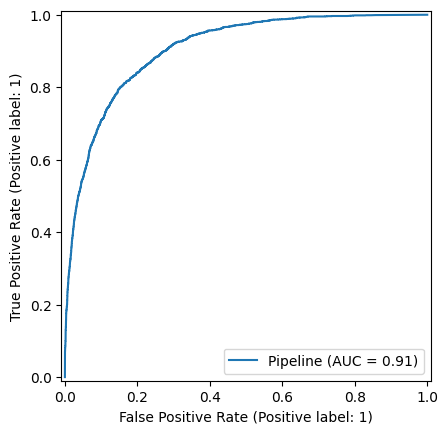

In [16]:
# For fun
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(pipe_final, X_test, Y_test)

# Target Recoding

In the first code chunk of this document, we loaded the data and immediately recoded the target variable `income`. Why is this [convenient](https://scikit-learn.org/stable/modules/model_evaluation.html#binary-case)?

The specific line was:

```
adult_dt = (pd.read_csv('../data/adult/adult.data', header = None, names = columns)
              .assign(income = lambda x: (x.income.str.strip() == '>50K')*1))
```

(Answer here.)
In this case the income {>50k and <50k} is a binary column, so it should be encoded in a binary way, preferably to 0 and 1. This will simplify our preprocessing steps and makes sure the results we get is compatible with roc_auc  and other binary classification metrics. Also, this was of encoding helps us in interpreting the results we get from our classification algorithms. 

# Reference

Becker,Barry and Kohavi,Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20.